In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Checking for null values

In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Column Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## Descriptive Statistics

In [8]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Tips according to total bill

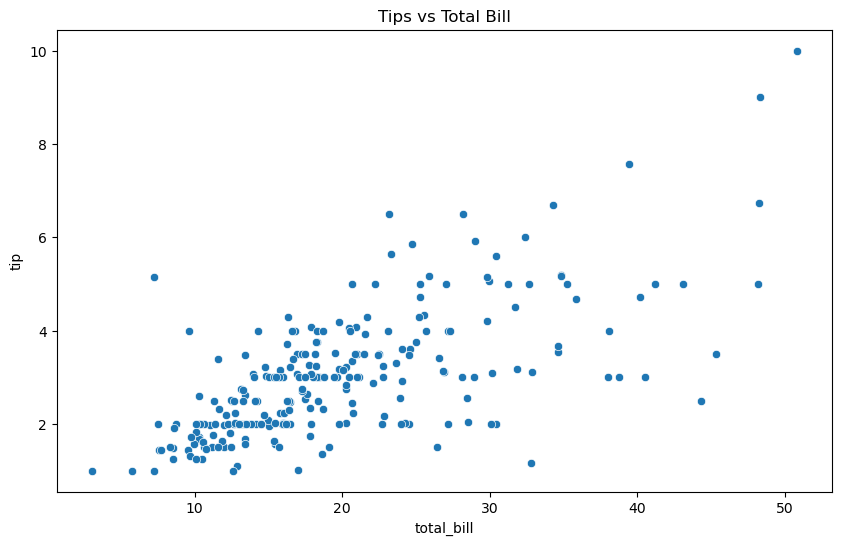

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Tips vs Total Bill')
plt.show()

## Tips according to the number of people at a table

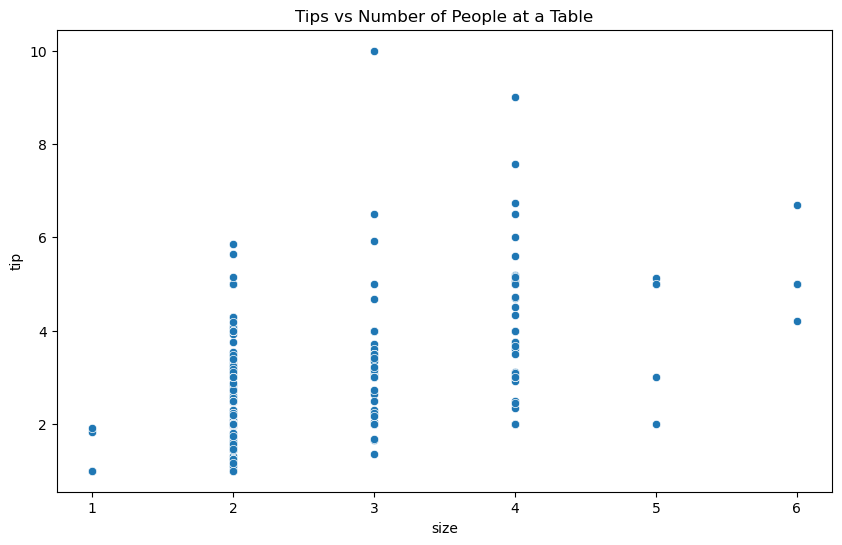

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size', y='tip', data=df)
plt.title('Tips vs Number of People at a Table')
plt.show()

# Tips according to the day of the week

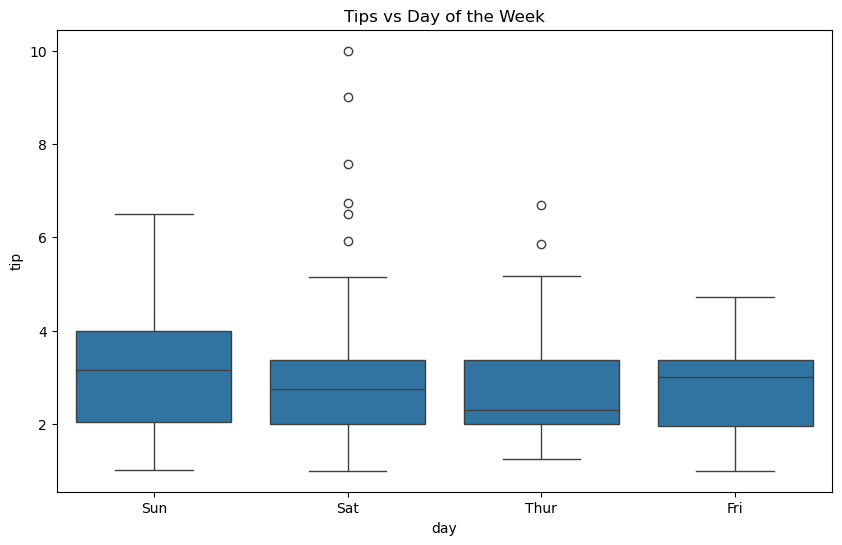

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='tip', data=df)
plt.title('Tips vs Day of the Week')
plt.show()

# Tips according to total bill and gender

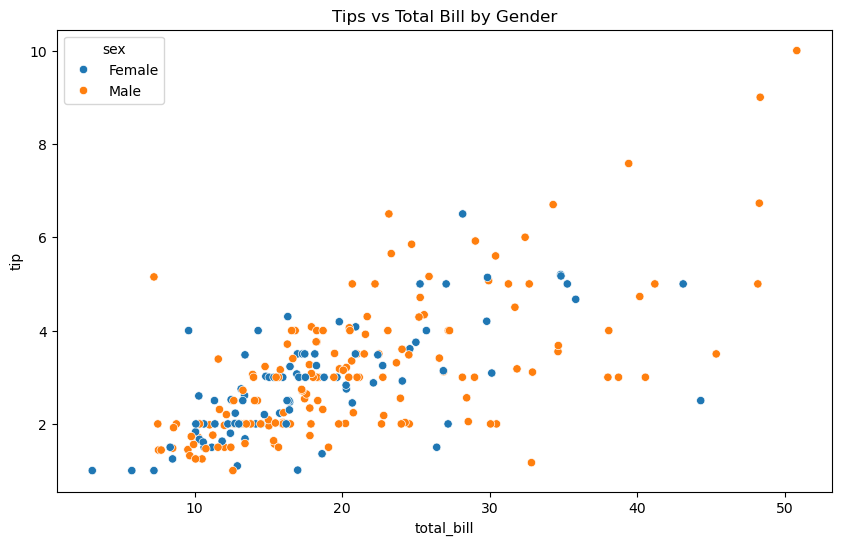

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df)
plt.title('Tips vs Total Bill by Gender')
plt.show()

## Tips according to number of people at a table and gender

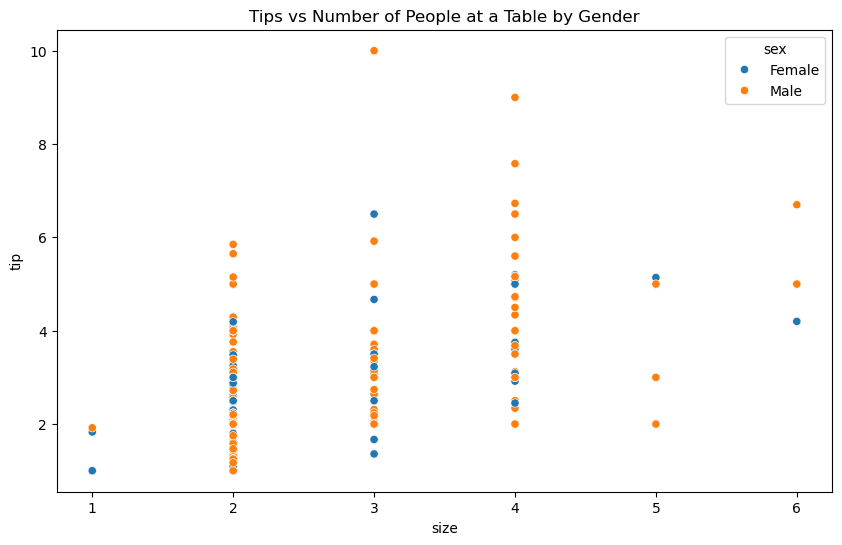

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size', y='tip', hue='sex', data=df)
plt.title('Tips vs Number of People at a Table by Gender')
plt.show()

## Tips according to total bill and time of meal

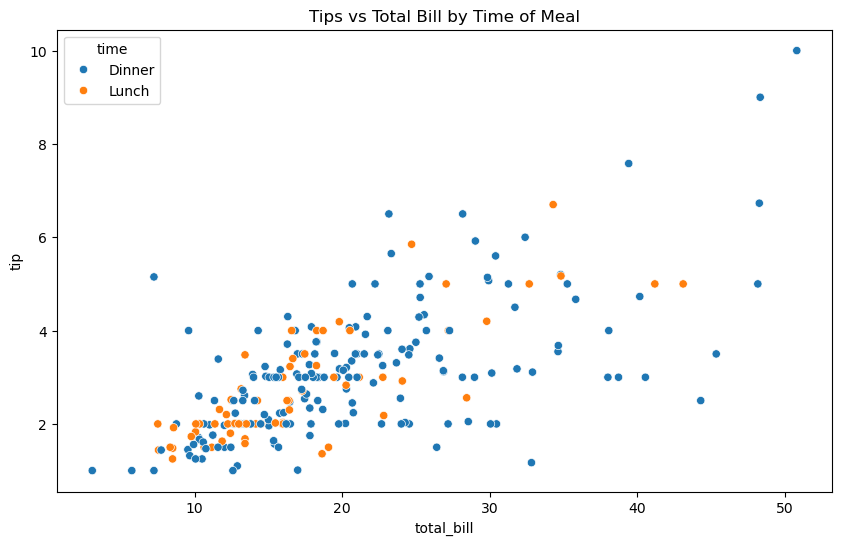

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', hue='time', data=df)
plt.title('Tips vs Total Bill by Time of Meal')
plt.show()

## Tips according to number of people at a table and time of meal

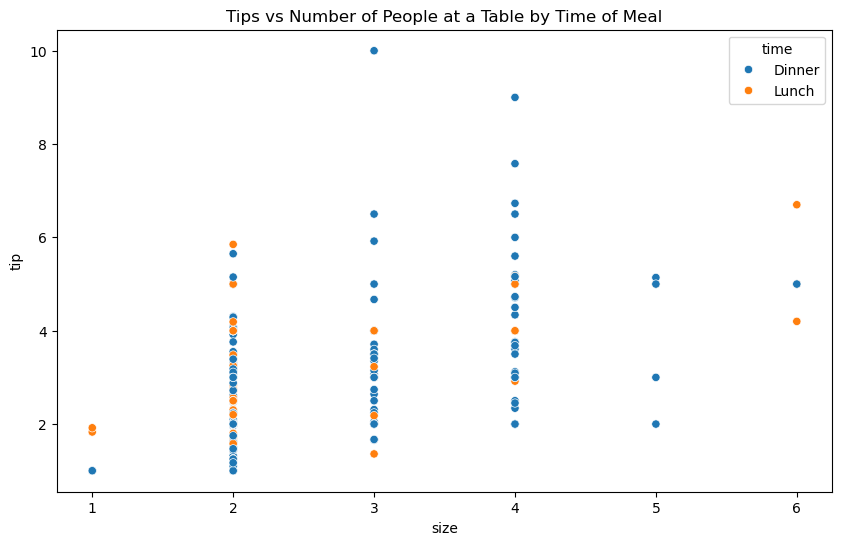

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='size', y='tip', hue='time', data=df)
plt.title('Tips vs Number of People at a Table by Time of Meal')
plt.show()

## Tips according to the day of the week

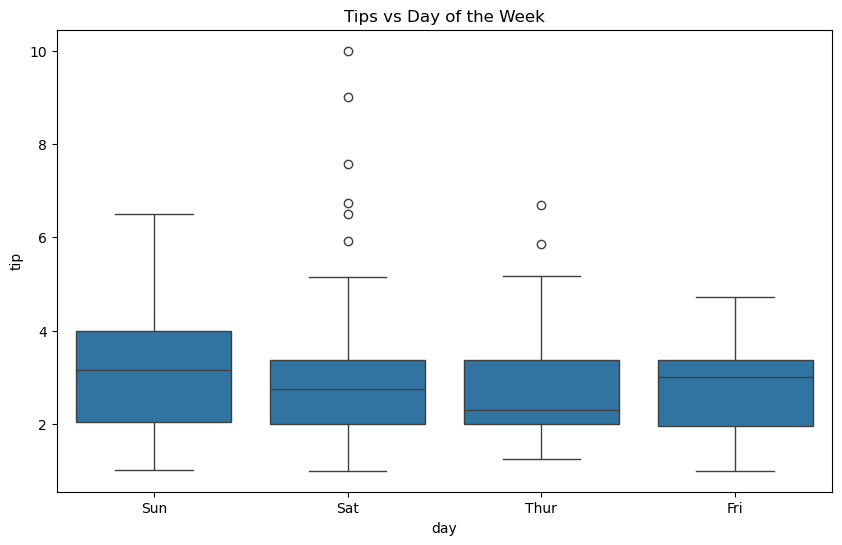

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='tip', data=df)
plt.title('Tips vs Day of the Week')
plt.show()

## Number of tips by gender

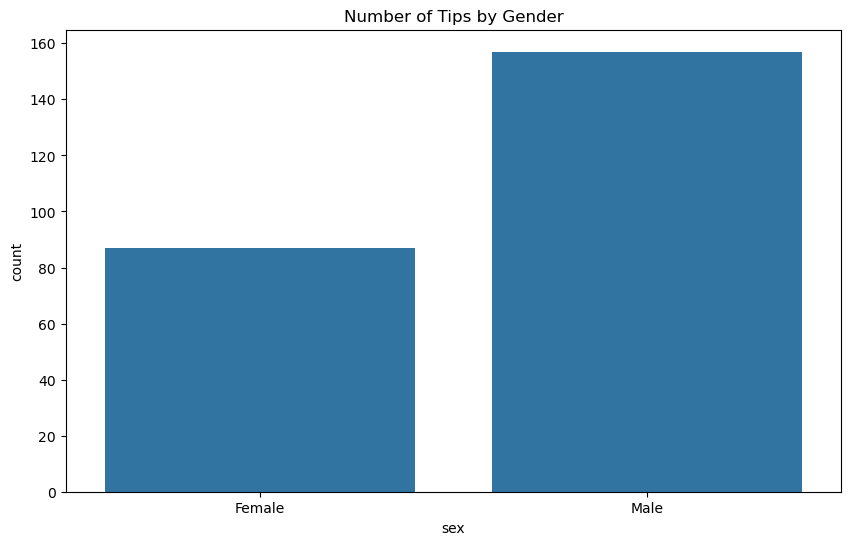

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df)
plt.title('Number of Tips by Gender')
plt.show()

## Tips according to smoker status

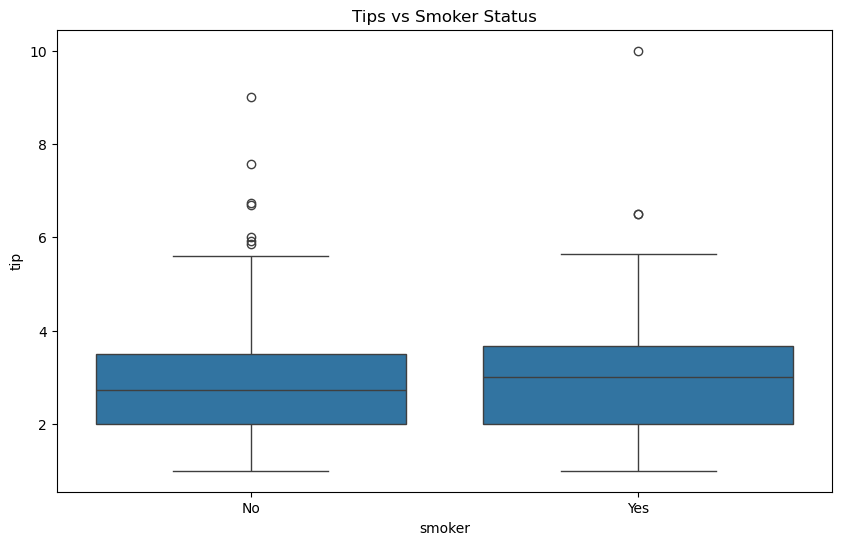

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='tip', data=df)
plt.title('Tips vs Smoker Status')
plt.show()

## Tips during lunch vs dinner

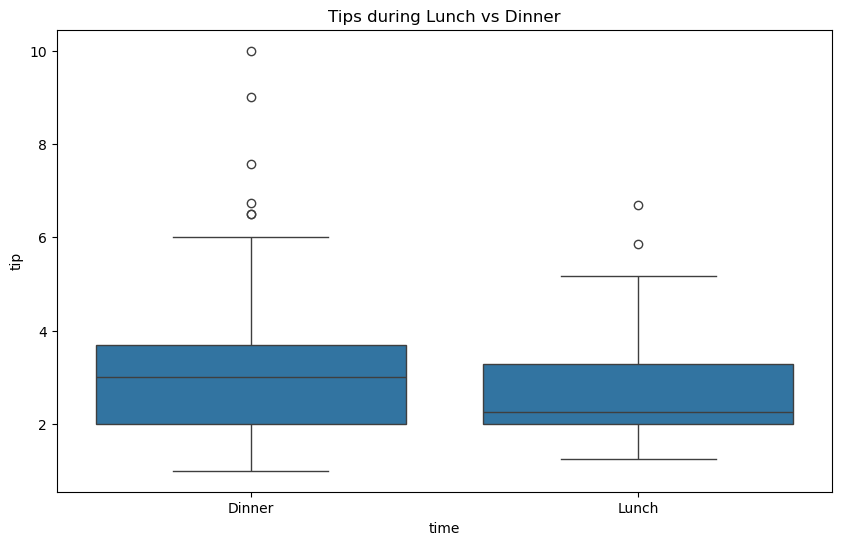

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='time', y='tip', data=df)
plt.title('Tips during Lunch vs Dinner')
plt.show()

## Transforming categorical variables into numerical values

In [30]:
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['smoker'] = df['smoker'].map({'Yes': 1, 'No': 0})
df['day'] = df['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})
df['time'] = df['time'].map({'Lunch': 0, 'Dinner': 1})

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


## Splitting the data

In [32]:
X = df.drop('tip', axis=1)
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training a Linear Regression model

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

## Evaluating the model

In [36]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

mse, rmse

(0.6963090766605351, 0.8344513626692301)

## Predicting tips for a specific input

In [38]:

input_data = {'total_bill': 24.50, 'sex': 1, 'smoker': 0, 'day': 0, 'time': 1, 'size': 4}
input_df = pd.DataFrame([input_data])

# Making prediction
prediction = model.predict(input_df)
prediction


array([3.73742609])